In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

complaints_ratio_df = pd.read_csv('../data/complaints_with_response_ratio.csv', delimiter=',')
complaints_sentiment_df = pd.read_csv('../data/complaints_with_sentiment_score.csv', delimiter=',')
complaints_regio_df = pd.read_csv('../data/complaints_with_region_ratio.csv', delimiter=',')

In [2]:
complaints_sentiment_df.replace({'Company response to consumer': {'Closed': 'Closed without explanation'}}, inplace= True)
complaints_sentiment_df = complaints_sentiment_df[complaints_sentiment_df['Company response to consumer'].isin(
    ['Closed with non-monetary relief',
    'Closed with monetary relief', 'Closed with explanation',
    'Closed without explanation', 'Untimely response'])]

In [3]:
print(complaints_ratio_df.shape)
print(complaints_sentiment_df.shape)
print(complaints_regio_df.shape)

(485699, 12)
(485699, 20)
(485699, 12)


In [4]:
merged_df = pd.merge(complaints_ratio_df, complaints_sentiment_df[['Complaint ID', 'Narrative sentiment score']], on='Complaint ID')
merged_df = merged_df.drop('Unnamed: 0', 1)
merged_df

,Complaint ID,Product,Narrative,Company,State,Response,Closed with explanation,Closed with non-monetary relief,Closed with monetary relief,Closed without explanation,Untimely response,Narrative sentiment score
0,3315279,"Credit reporting, repair, or other",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.155694
1,3259329,"Credit reporting, repair, or other","According to the Fair Credit Reporting Act, Se...",Experian Information Solutions Inc.,HI,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.235102
2,3266929,"Credit reporting, repair, or other",EXPERIAN HAS SOME INFORMATION ON MY CREDIT REP...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.215753
3,3222896,"Credit reporting, repair, or other",Accounts added and/or created unbeknownst to m...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.473450
4,3289721,"Credit reporting, repair, or other",I do not own this debt and demand that you imm...,Experian Information Solutions Inc.,GA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.462072
...,...,...,...,...,...,...,...,...,...,...,...,...
485694,2005685,Debt collection,"NorAm Capital Holdings, Inc. \ncollecting for ...","NorAm Capital Holdings, Inc.",CA,Closed without explanation,0.00,0.00,0.00,100.00,0.0,0.549215
485695,3038874,"Payday loan, title loan, or personal loan",fbi is involved and cc the matter- even thru f...,"3D Financial, LP",AZ,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.247246
485696,3073029,Mortgage,"Please See Attachments Based on my experience,...",Homes By Hunt LLC,LA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.672983
485697,2365852,Money transfers,I send some money to XXXX through XXXX And my ...,Maxitransfers Corporation,GA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.353015


In [5]:
merged_df = pd.merge(merged_df, complaints_regio_df[['Complaint ID', 'Region','Closed with explanation', 'Closed with non-monetary relief', 'Closed with monetary relief', 'Closed without explanation', 'Untimely response']],how='left', on='Complaint ID')
merged_df

,Complaint ID,Product,Narrative,Company,State,Response,Closed with explanation_x,Closed with non-monetary relief_x,Closed with monetary relief_x,Closed without explanation_x,Untimely response_x,Narrative sentiment score,Region,Closed with explanation_y,Closed with non-monetary relief_y,Closed with monetary relief_y,Closed without explanation_y,Untimely response_y
0,3315279,"Credit reporting, repair, or other",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.155694,West,0.209104,0.029877,0.015800,0.002460,0.001687
1,3259329,"Credit reporting, repair, or other","According to the Fair Credit Reporting Act, Se...",Experian Information Solutions Inc.,HI,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.235102,West,0.209104,0.029877,0.015800,0.002460,0.001687
2,3266929,"Credit reporting, repair, or other",EXPERIAN HAS SOME INFORMATION ON MY CREDIT REP...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.215753,South,0.245480,0.039663,0.013056,0.002043,0.002051
3,3222896,"Credit reporting, repair, or other",Accounts added and/or created unbeknownst to m...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.473450,South,0.245480,0.039663,0.013056,0.002043,0.002051
4,3289721,"Credit reporting, repair, or other",I do not own this debt and demand that you imm...,Experian Information Solutions Inc.,GA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.462072,South,0.245480,0.039663,0.013056,0.002043,0.002051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485694,2005685,Debt collection,"NorAm Capital Holdings, Inc. \ncollecting for ...","NorAm Capital Holdings, Inc.",CA,Closed without explanation,0.00,0.00,0.00,100.00,0.0,0.549215,West,0.209104,0.029877,0.015800,0.002460,0.001687
485695,3038874,"Payday loan, title loan, or personal loan",fbi is involved and cc the matter- even thru f...,"3D Financial, LP",AZ,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.247246,West,0.209104,0.029877,0.015800,0.002460,0.001687
485696,3073029,Mortgage,"Please See Attachments Based on my experience,...",Homes By Hunt LLC,LA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.672983,South,0.245480,0.039663,0.013056,0.002043,0.002051
485697,2365852,Money transfers,I send some money to XXXX through XXXX And my ...,Maxitransfers Corporation,GA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.353015,South,0.245480,0.039663,0.013056,0.002043,0.002051


In [6]:
merged_df_og = merged_df
merged_df = merged_df_og.sample(n=5000)
merged_df

,Complaint ID,Product,Narrative,Company,State,Response,Closed with explanation_x,Closed with non-monetary relief_x,Closed with monetary relief_x,Closed without explanation_x,Untimely response_x,Narrative sentiment score,Region,Closed with explanation_y,Closed with non-monetary relief_y,Closed with monetary relief_y,Closed without explanation_y,Untimely response_y
250571,2333423,Debt collection,They call me twice a day everyday of the week....,PORTFOLIO RECOVERY ASSOCIATES INC,CA,Closed with non-monetary relief,66.19,33.73,0.08,0.00,0.0,0.166331,West,0.209104,0.029877,0.015800,0.002460,0.001687
19958,2756256,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...,Experian Information Solutions Inc.,PA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.403003,Northeast,0.195686,0.028874,0.017621,0.001868,0.001237
72687,2650193,"Credit reporting, repair, or other",This dispute is regarding account # XXXX for X...,"EQUIFAX, INC.",OH,Closed with explanation,84.28,15.63,0.04,0.05,0.0,0.200998,Midwest,0.156251,0.023895,0.010520,0.001497,0.001331
372021,2993600,Debt collection,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX, Alabama Wa...","WAKEFIELD & ASSOCIATES, INC.",AL,Closed with explanation,98.88,0.45,0.00,0.67,0.0,0.394220,South,0.245480,0.039663,0.013056,0.002043,0.002051
225125,2728143,Credit card or prepaid card,"Received an email from XXXX on XXXX XXXX, 2017...",CAPITAL ONE FINANCIAL CORPORATION,WA,Closed with explanation,80.79,10.04,9.09,0.08,0.0,0.031572,West,0.209104,0.029877,0.015800,0.002460,0.001687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149089,2950203,"Credit reporting, repair, or other","To Whom It May Concern, XXXX XXXX has a paid c...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,Closed with explanation,89.57,9.96,0.47,0.01,0.0,0.198288,South,0.245480,0.039663,0.013056,0.002043,0.002051
373733,2795033,Mortgage,I have had a very difficult time with XXXX XXX...,RUSHMORE LOAN MANAGEMENT SERVICES LLC,WA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.145099,West,0.209104,0.029877,0.015800,0.002460,0.001687
376157,1579584,Consumer Loan,I had a line of credit that should not be repo...,Resurgent Capital Services L.P.,GA,Closed with explanation,89.58,9.69,0.34,0.39,0.0,0.131576,South,0.245480,0.039663,0.013056,0.002043,0.002051
165201,2943587,Student loan,I took out {$49000.00} dollars in loans ( dire...,"Navient Solutions, LLC.",OH,Closed with non-monetary relief,96.67,1.79,1.52,0.01,0.0,0.191636,Midwest,0.156251,0.023895,0.010520,0.001497,0.001331


### Zonder balancing

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

feature_names = ['Closed with explanation_x', 'Closed with non-monetary relief_x', 'Closed with monetary relief_x',
                'Closed without explanation_x', 'Untimely response_x', 'Narrative sentiment score']
X = merged_df[feature_names]
y = merged_df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4000, 6)
(4000,)
(1000, 6)
(1000,)


In [8]:
model = SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names= merged_df['Response'].unique()))

                                 precision    recall  f1-score   support

Closed with non-monetary relief       0.81      0.99      0.89       808
        Closed with explanation       0.00      0.00      0.00        30
     Closed without explanation       0.75      0.02      0.04       146
    Closed with monetary relief       1.00      0.11      0.20         9
              Untimely response       0.43      0.43      0.43         7

                       accuracy                           0.81      1000
                      macro avg       0.60      0.31      0.31      1000
                   weighted avg       0.78      0.81      0.73      1000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


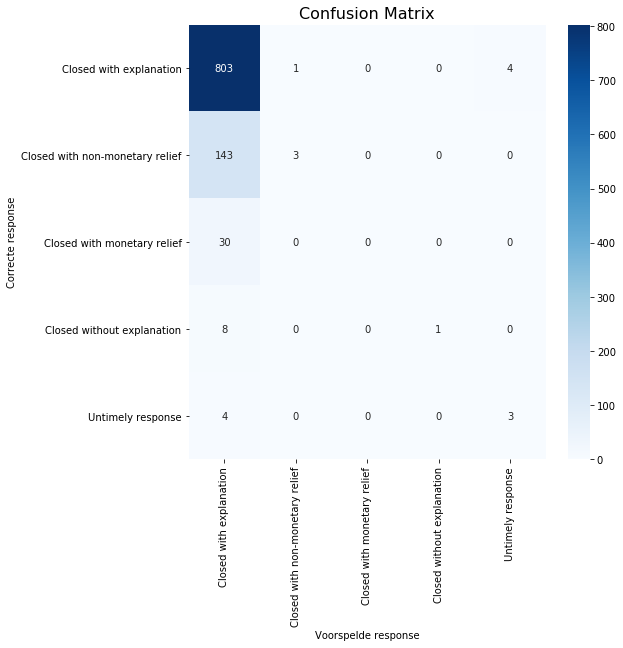

In [10]:
labels = ['Closed with explanation', 'Closed with non-monetary relief', 'Closed with monetary relief',
                'Closed without explanation', 'Untimely response']
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);

### Met balancing

In [11]:
def sampling_k_elements(category, k=120000):
    if len(category) < k:
        return category
    return category.sample(k)

complaints_balanced_df = merged_df.groupby('Response').apply(sampling_k_elements).reset_index(drop=True)

In [12]:
complaints_balanced_df.shape

(5000, 18)

In [13]:
X_bal = complaints_balanced_df[feature_names]
y_bal = complaints_balanced_df['Response']
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.2)

print(X_bal_train.shape)
print(y_bal_train.shape)

print(X_bal_test.shape)
print(y_bal_test.shape)

(4000, 6)
(4000,)
(1000, 6)
(1000,)


In [14]:
model_bal = SVC(gamma='scale')
model_bal.fit(X_bal_train, y_bal_train)
y_bal_pred = model.predict(X_bal_test)

In [15]:
print(metrics.classification_report(y_bal_test, y_bal_pred, target_names= complaints_balanced_df['Response'].unique()))

                                 precision    recall  f1-score   support

Closed with non-monetary relief       0.82      1.00      0.90       812
        Closed with explanation       0.00      0.00      0.00        43
     Closed without explanation       1.00      0.04      0.07       130
    Closed with monetary relief       1.00      0.17      0.29         6
              Untimely response       0.75      0.67      0.71         9

                       accuracy                           0.82      1000
                      macro avg       0.71      0.37      0.39      1000
                   weighted avg       0.81      0.82      0.75      1000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


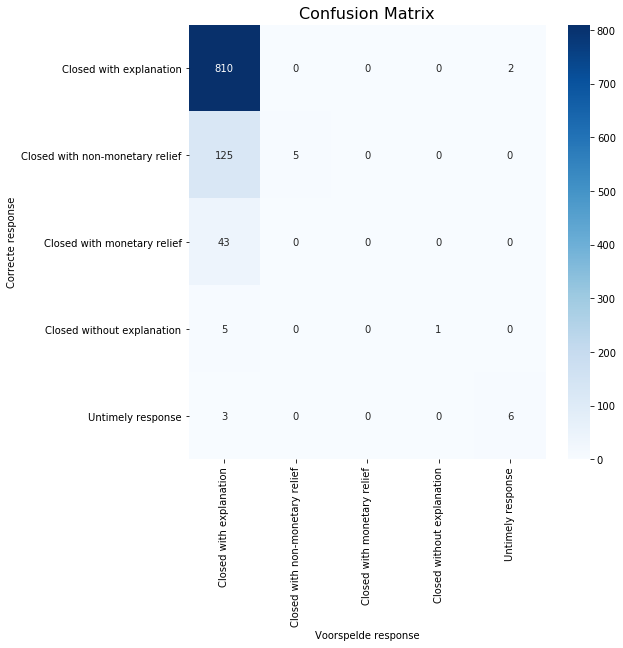

In [16]:
conf_mat_bal = confusion_matrix(y_bal_test, y_bal_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat_bal, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);

### Met regio kansen en balancing

In [17]:
feature_names = ['Closed with explanation_x', 'Closed with non-monetary relief_x', 'Closed with monetary relief_x',
                'Closed without explanation_x', 'Untimely response_x', 'Narrative sentiment score']


In [18]:
X_bal = complaints_balanced_df[feature_names]
y_bal = complaints_balanced_df['Response']
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.2)

print(X_bal_train.shape)
print(y_bal_train.shape)

print(X_bal_test.shape)
print(y_bal_test.shape)

(4000, 6)
(4000,)
(1000, 6)
(1000,)


In [19]:
print(metrics.classification_report(y_bal_test, y_bal_pred, target_names= complaints_balanced_df['Response'].unique()))

                                 precision    recall  f1-score   support

Closed with non-monetary relief       0.80      0.99      0.88       802
        Closed with explanation       0.00      0.00      0.00        45
     Closed without explanation       0.00      0.00      0.00       137
    Closed with monetary relief       0.00      0.00      0.00         9
              Untimely response       0.00      0.00      0.00         7

                       accuracy                           0.79      1000
                      macro avg       0.16      0.20      0.18      1000
                   weighted avg       0.64      0.79      0.71      1000



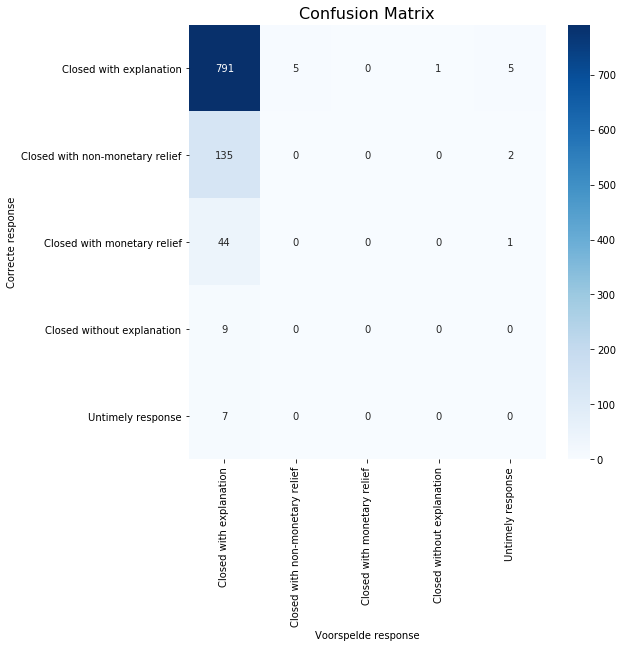

In [20]:
conf_mat_bal = confusion_matrix(y_bal_test, y_bal_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat_bal, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);

### Met hyperparameter tuning

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(
    SVC(), tuned_parameters)
clf.fit(X_bal_train, y_bal_train)


In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classif = svm.LinearSVC()
classif.fit(train_features, y_bal_train)
test_predictions = classif.predict(test_features)
print(accuracy_score(test_predictions, y_bal_test))

0.804


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.LinearSVC()
classifier.fit(train_features, y_bal_train)
test_predictions = classifier.predict(test_features)
print(accuracy_score(test_predictions, y_bal_test))

0.8125


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
